In [16]:
""" This module implements the base function to implement a VQE for a Ising Chain with Transverse Field. """
import pennylane as qml
from pennylane import numpy as np
import numpy as onp
import jax
import jax.numpy as jnp
from jax import jit
from functools import partial

from matplotlib import pyplot as plt

import copy
import tqdm  # Pretty progress bars

import sys
sys.path.insert(0, '../')
import vqe as vqe
import annni_model as annni
import qcnn as qcnn
import visualization as qplt
import encoder as enc
import losses

In [2]:
path = '../data/vqes/ANNNI/'

In [3]:
N = 12
side = 50


In [9]:
myvqe = vqe.load_vqe(path+'N'+str(N)+'n'+str(side))

In [10]:
myvqe.MSE0 = [0]

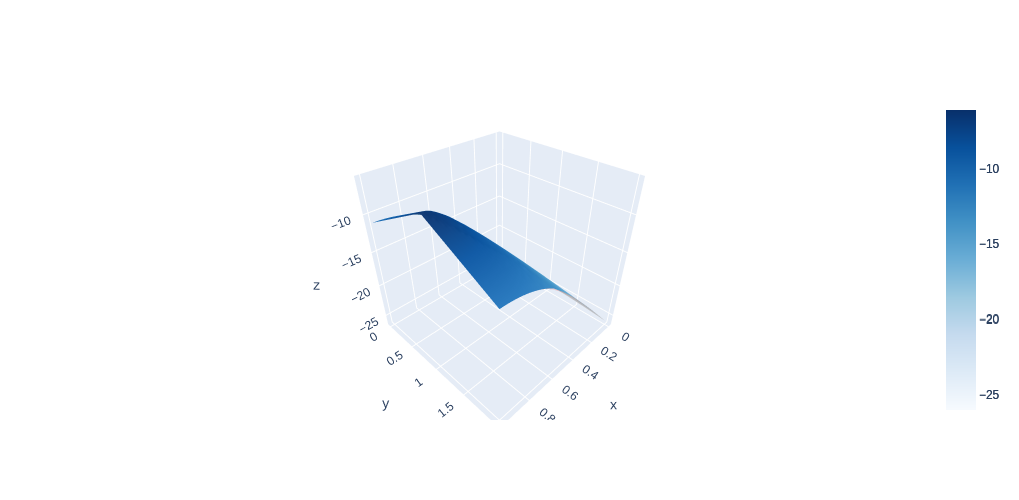

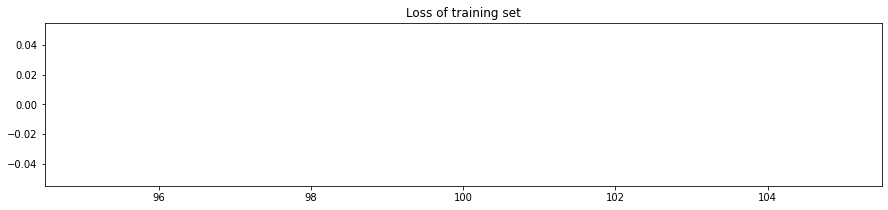

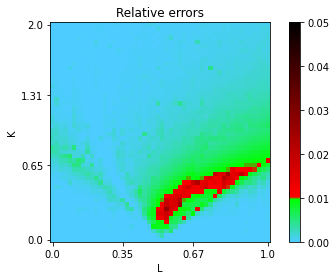

In [11]:
qplt.show_VQE_annni(myvqe)

In [13]:
myqcnn = qcnn.qcnn(myvqe, qcnn.qcnn_circuit, n_outputs = 2)

In [14]:
train_index = np.arange(0,2*side-1)

In [107]:
train_index = np.arange(side,2*side-1)

In [116]:
train_index = np.concatenate((np.arange(side//2+1,side), np.arange(side//2+1+side,2*side-1)))

In [117]:
myqcnn.train(.25, 1000, train_index, losses.cross_entropy_multiclass, circuit=True)

+--- CIRCUIT ---+
 0: ──||──||──RY(0.00)───RX(12.00)──||──RY(24.00)─────||──RY(30.00)─╭C──RY(37.00)──||
 1: ──||──||──RY(1.00)───RX(13.00)──||──RY(24.00)─╭C──||──RY(31.00)─╰X──RY(38.00)──||
 2: ──||──||──RY(2.00)───RX(14.00)──||──RY(25.00)─╰X──||──RY(31.00)─╭C──RY(39.00)──||
 3: ──||──||──RY(3.00)───RX(15.00)──||──RY(25.00)─╭C──||──RY(32.00)─╰X──RY(40.00)──||
 4: ──||──||──RY(4.00)───RX(16.00)──||──RY(26.00)─╰X──||──RY(32.00)─╭C──RY(41.00)──||
 5: ──||──||──RY(5.00)───RX(17.00)──||──RY(26.00)─╭C──||──RY(33.00)─╰X──RY(42.00)──||
 6: ──||──||──RY(6.00)───RX(18.00)──||──RY(27.00)─╰X──||──RY(33.00)─╭C──RY(43.00)──||
 7: ──||──||──RY(7.00)───RX(19.00)──||──RY(27.00)─╭C──||──RY(34.00)─╰X──RY(44.00)──||
 8: ──||──||──RY(8.00)───RX(20.00)──||──RY(28.00)─╰X──||──RY(34.00)─╭C──RY(45.00)──||
 9: ──||──||──RY(9.00)───RX(21.00)──||──RY(28.00)─╭C──||──RY(35.00)─╰X──RY(46.00)──||
10: ──||──||──RY(10.00)──RX(22.00)──||──RY(29.00)─╰X──||──RY(35.00)─╭C──RY(47.00)──||
11: ──||──||──RY(11.00)──RX(23.00)──

Cost: 0.013134022243320942: 100%|███████████| 1000/1000 [01:42<00:00,  9.79it/s]


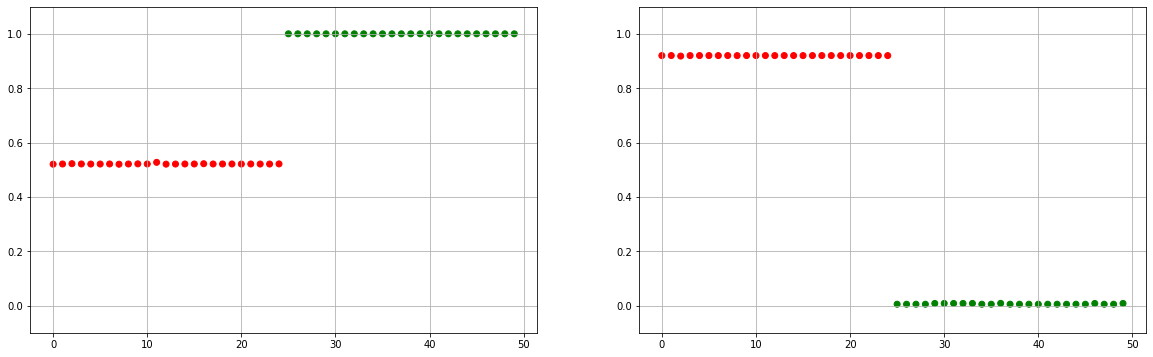

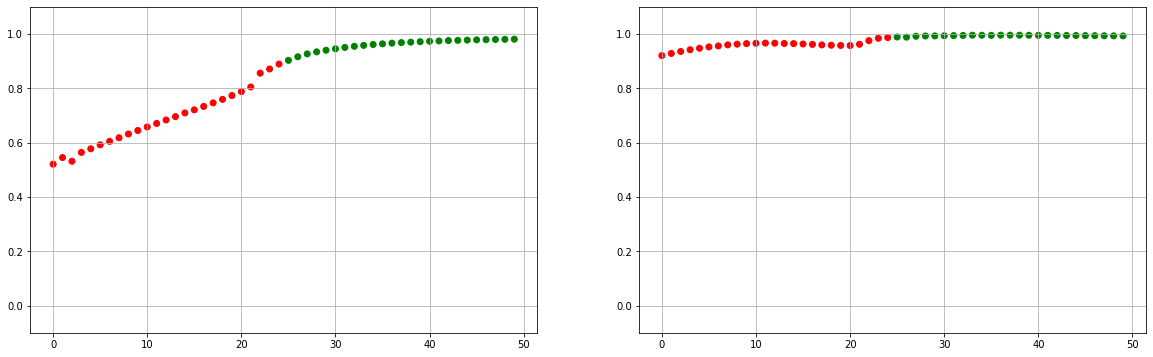

In [118]:
qplt.show_QCNN_classification2D(myqcnn)

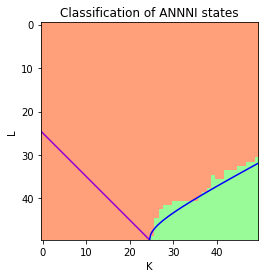

In [119]:
qplt.show_QCNN_classificationANNNI(myqcnn, hard_thr = True)

[[178.44580617  71.36725936  76.55419383]
 [176.35155044  67.25095354  78.64844956]
 [178.97594802  68.05386566  76.02405198]
 ...
 [120.08452311  14.23733633 134.91547689]
 [120.22286775  13.83003025 134.77713225]
 [120.50168159  13.57901572 134.49831841]]


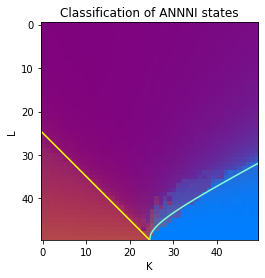

In [120]:
qplt.show_QCNN_classificationANNNI(myqcnn, hard_thr = False)